**Prototype 2**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip /content/drive/MyDrive/rcnn/colabzip.zip
!pip install -r "/content/colab zip/requirements.txt"
!python "/content/colab zip/setup.py" install

Archive:  /content/drive/MyDrive/rcnn/colabzip.zip
   creating: colab zip/
  inflating: colab zip/Train_Mask_RCNN_(DEMO)(2).ipynb  
  inflating: colab zip/setup.py      
  inflating: colab zip/result.json   
  inflating: colab zip/setup.cfg     
   creating: colab zip/dataset/
  inflating: colab zip/dataset/499e015b-9-1.jpg  
  inflating: colab zip/dataset/86c1145d-13-1.jpg  
  inflating: colab zip/dataset/372d9e51-5-1.jpg  
  inflating: colab zip/dataset/c109f0cf-10-1.jpg  
  inflating: colab zip/dataset/9da6ad1a-14-1.jpg  
  inflating: colab zip/dataset/cfc04125-3-1.jpg  
  inflating: colab zip/dataset/3fe528d8-11-1.jpg  
  inflating: colab zip/dataset/b518fecc-1-2.jpg  
  inflating: colab zip/dataset/0ed93c3e-1-1.jpg  
  inflating: colab zip/dataset/8f24d389-2-2.jpg  
  inflating: colab zip/dataset/a8bc8e10-2-1.jpg  
  inflating: colab zip/dataset/e99dfb64-8-2.jpg  
  inflating: colab zip/dataset/5a173780-12-1.jpg  
  inflating: colab zip/dataset/aa04eb5a-8-1.jpg  
  inflating: cola

In [7]:
!cp -r "/content/colab zip/mrcnn" "/content/"

In [8]:
from mrcnn.m_rcnn import *
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
from PIL import Image, ImageDraw
Modelpath="/content/drive/MyDrive/rcnn/mask_rcnn_object_0010.h5"
Imagespath="/content/drive/MyDrive/rcnn/dataset"
annotations_path = "/content/drive/MyDrive/rcnn/result.json"


VERS 0.2


Using TensorFlow backend.


... done downloading pretrained model!


In [9]:
def load_inference_model(num_classes, model_path):
    inference_config = InferenceConfig(num_classes)

    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode="inference",
                              config=inference_config,
                              model_dir=model_path)
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)
    return model, inference_config

In [10]:
model, inference_config=load_inference_model(1,Modelpath)

Loading weights from  /content/drive/MyDrive/rcnn/mask_rcnn_object_0010.h5


In [11]:
# import tensorflow as tf
# tf.keras.utils.plot_model(
#     model.keras_model,
#     to_file="model.png",
#     show_shapes=False,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,

# )

model.keras_model.summary()

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

In [12]:
dataset_train = load_image_dataset(annotations_path, Imagespath, "train")
dataset_val = load_image_dataset(annotations_path, Imagespath, "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/rcnn/result.json
Annotation json path:  /content/drive/MyDrive/rcnn/result.json
Train: 18
Validation: 2
Classes: 1


Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


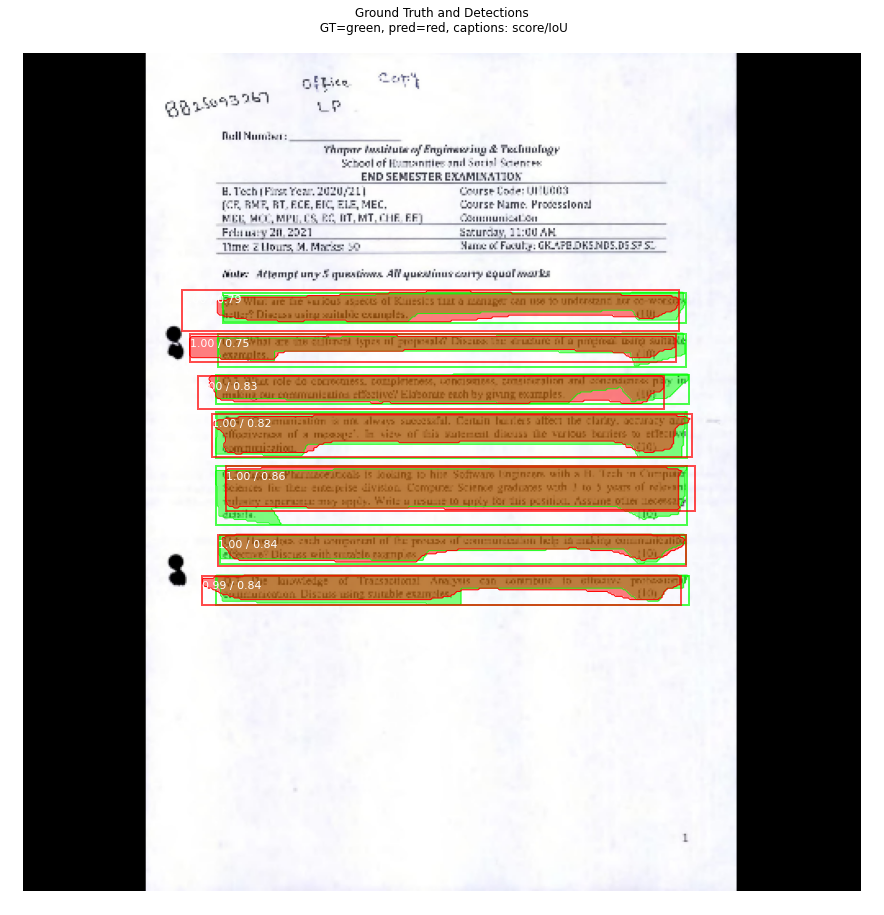

In [14]:
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
results = model.detect([original_image], verbose=1)
r = results[0]
visualize.display_differences(original_image, gt_bbox,gt_class_id,gt_mask,r['rois'],r['class_ids'],r['scores'],r['masks'],dataset_val.class_names,score_threshold=0.95)

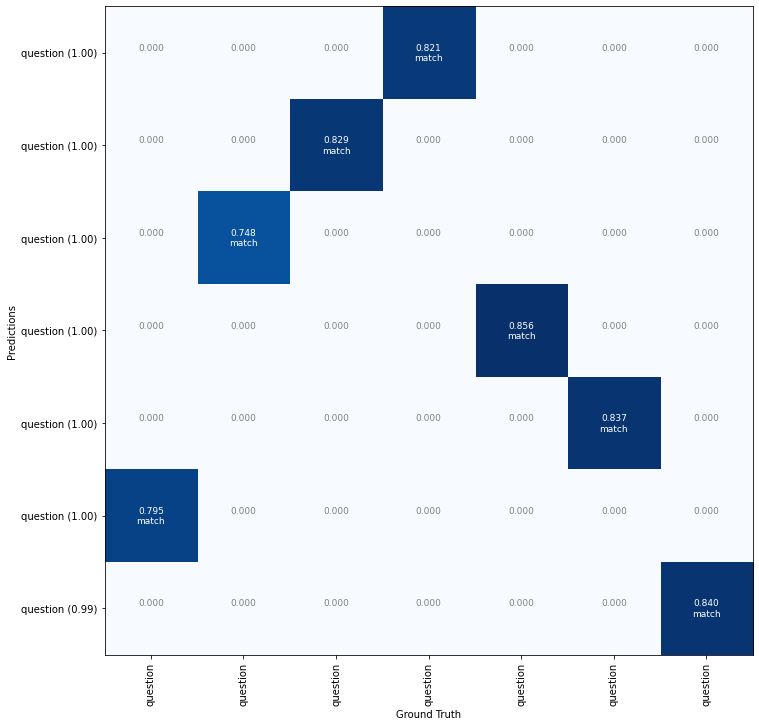

In [15]:
gt_match, pred_match, overlaps = utils.compute_matches(
        gt_bbox, gt_class_id, gt_mask,
        r['rois'], r['class_ids'],r['scores'],r['masks'],
        iou_threshold=0.5, score_threshold=0.5)
visualize.plot_overlaps(gt_class_id,r['class_ids'],r['scores'],overlaps,dataset_val.class_names)

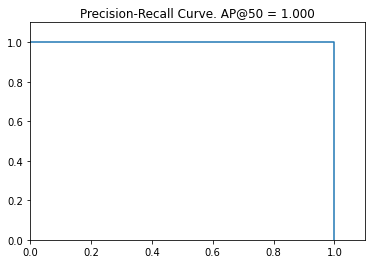

In [16]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)

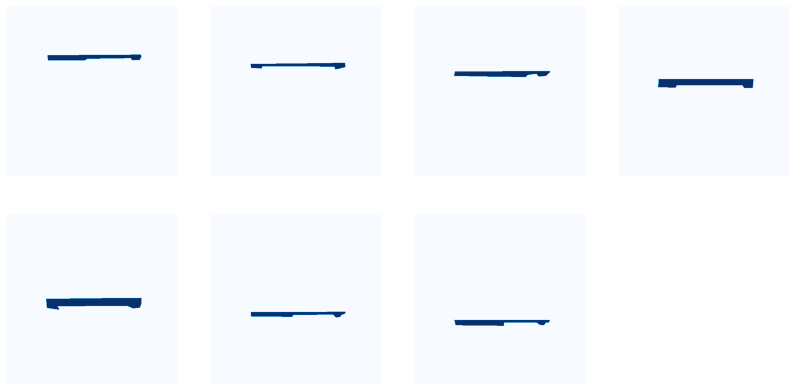

In [17]:
visualize.display_images(np.transpose(gt_mask, [2, 0, 1]), cmap="Blues")

In [18]:
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
    modellib.load_image_gt(dataset_val, inference_config,
                            image_id, use_mini_mask=False)
list(map(lambda x:[x['path'],x['width'],x['height']],dataset_val.image_info))

[['/content/drive/MyDrive/rcnn/dataset/9da6ad1a-14-1.jpg', 1650, 2337],
 ['/content/drive/MyDrive/rcnn/dataset/aa04eb5a-8-1.jpg', 1650, 2337]]

In [19]:
from PIL import Image 
image_id = dataset_val.image_ids[1]
original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
results = model.detect([original_image], verbose=1)
r = results[0]
# val_path=""
# for i in dataset_val.image_info:
#     if i['id']==image_id:
#         val_path=i['path']
#         break
# print(val_path)
# img = Image.open(val_path) 

# img_res = img.crop( r['rois'][0]) 

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


In [20]:
# visualize.display_images([original_image], cmap="Blues",cols=1)

# original_image.shape
# print([i for i in r['scores'] if i>=0.95])
rois=[]
for i,j in zip(r['scores'],r['rois']):
    if i>=0.95:
        rois.append(j)


In [22]:
!pip install easyocr

     |████████████████████████████████| 70.8 MB 97.7 MB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 


<class 'numpy.ndarray'>
(512, 512, 3) (2337, 2337, 3)


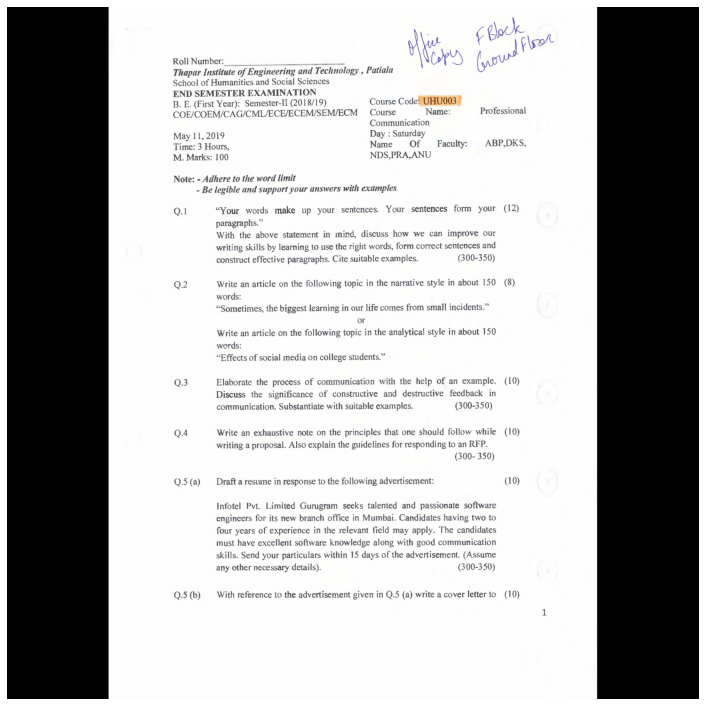

In [24]:
from mrcnn.utils import resize_image
img = Image.open('/content/drive/MyDrive/rcnn/dataset/aa04eb5a-8-1.jpg').convert('RGB')
img1 = Image.open('/content/drive/MyDrive/rcnn/dataset/aa04eb5a-8-1.jpg').convert('RGB')
img2=img1
img2=np.array(img2)
img2, window, scale, padding, crop=resize_image(img2,max_dim=2337)
print(type(img2))
print(original_image.shape,np.array(img2).shape)
# visualize.display_images([original_image], cmap="Blues",cols=1)
visualize.display_images([img2], cmap="Blues",cols=1)



Actual size :  (1650, 2337)
paragraphs ' With   the   above statement in  inird,  discuss how we can improve our writing skills by learning to use the right words; form correct sentences and construct effective paragraphs Cite suitable examples: (300-350)


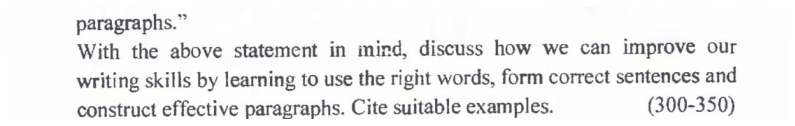

Q.2 Write an article on the following topic in the narrative style in about words:


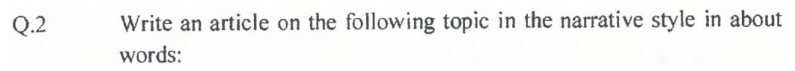

#Sometimes; the biggest learning in our life comes from small incidents


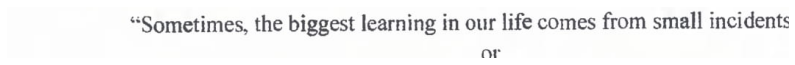

Write an article on the following topic in the analytical style in about 150 words: "Effects of social media on college students'


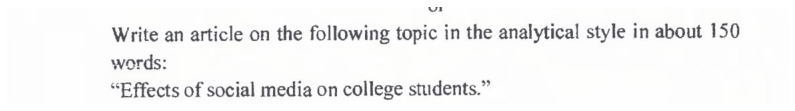

Q.3 Elaborate the process of communication  with the help of an example: Discuss the significance of constructive and destructive feedback in communication. Substantiate with suitable examples: (300-350)


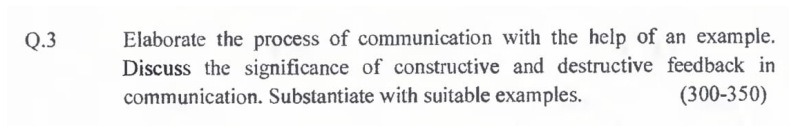

Q.4 Write an exhaustive note on the principles that one should follow while writing & proposal Also explain the guidelines for responding to an RFP . (300- 350)


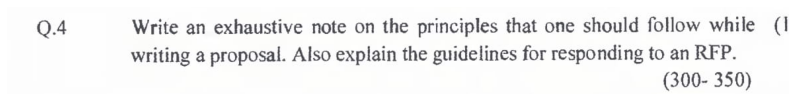

Q.5 (a) Draft a resuine in response to the following advertisement: Infotel Pvt. Limited Gurugram seeks talented and passionate  software engineers for its new branch office in Mumbai. Candidates having two to four years of experience in the relevant field may apply. The candidates must have excellent software knowledge along with good communication skills. Send your particulars within 1S days of the advertisement. (Assume any other necessary details) (300-350)


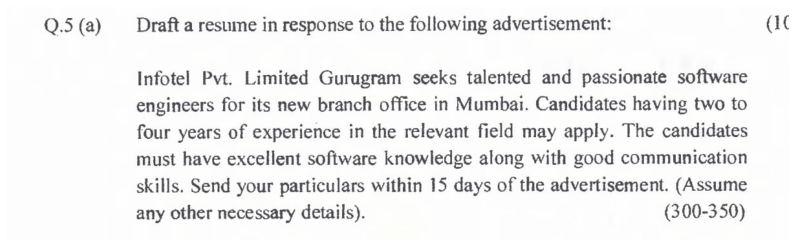

Q.5 (b) With reference to the advertisement given in Q.5 (a) write & cover letter to (10)


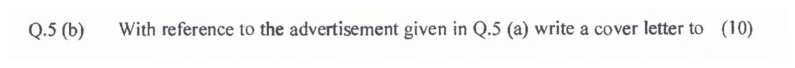

In [27]:
img = Image.open('/content/drive/MyDrive/rcnn/dataset/aa04eb5a-8-1.jpg').convert('RGB')
img1 = Image.open('/content/drive/MyDrive/rcnn/dataset/aa04eb5a-8-1.jpg').convert('RGB')
import easyocr
language = easyocr.Reader(['en'])
print("Actual size : ", img.size)
pad=75.25
pad=343.5

def extract_questions_image(rois,img):
    img_arr=[]
    img2=img
    q_arr=[]
    for i in rois:
        # print(i)
        roi=i
        img=Image.fromarray(img2)
        l = (roi[1])*(2337/512)
        t = roi[0]*(2337/512)
        ri = (roi[3])*(2337/512)
        b = roi[2]*(2337/512)
        img = img.crop((l, t, ri, b))
        #   img = img.crop((0+pad, 0, 1000+pad, 1000))
        # print(roi)
        img=np.asarray(img)
        img_arr.append((img,[t,l,b,ri]))
    img_arr.sort(key = lambda x: x[1][0])
    for i in img_arr:
        text = language.readtext(i[0],paragraph=True)
        s=' '.join([k[1] for k in text])
        print(s)
        q_arr.append(s)
        visualize.display_images([i[0]], cmap="Blues",cols=1)
    # return img_arr
    print()
    return q_arr,[i[1] for i in img_arr]
img_arr=extract_questions_image(rois,img2)





Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
paragraphs ' With   the   above statement in  inird,  discuss how we can improve our writing skills by learning to use the right words; form correct sentences and construct effective paragraphs Cite suitable examples: (300-350)


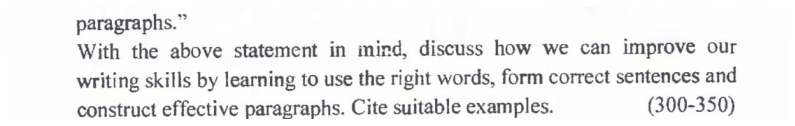

Q.2 Write an article on the following topic in the narrative style in about words:


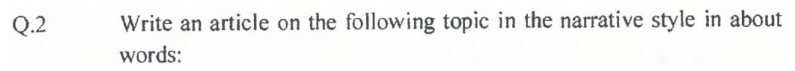

#Sometimes; the biggest learning in our life comes from small incidents


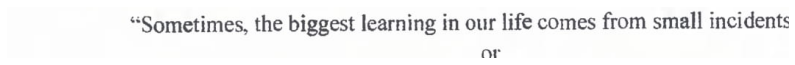

Write an article on the following topic in the analytical style in about 150 words: "Effects of social media on college students'


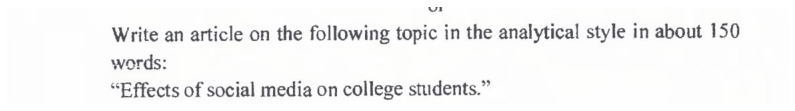

Q.3 Elaborate the process of communication  with the help of an example: Discuss the significance of constructive and destructive feedback in communication. Substantiate with suitable examples: (300-350)


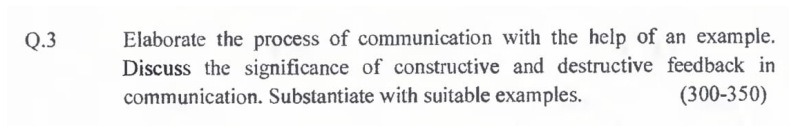

Q.4 Write an exhaustive note on the principles that one should follow while writing & proposal Also explain the guidelines for responding to an RFP . (300- 350)


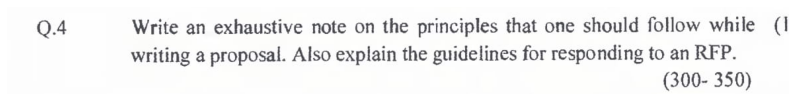

Q.5 (a) Draft a resuine in response to the following advertisement: Infotel Pvt. Limited Gurugram seeks talented and passionate  software engineers for its new branch office in Mumbai. Candidates having two to four years of experience in the relevant field may apply. The candidates must have excellent software knowledge along with good communication skills. Send your particulars within 1S days of the advertisement. (Assume any other necessary details) (300-350)


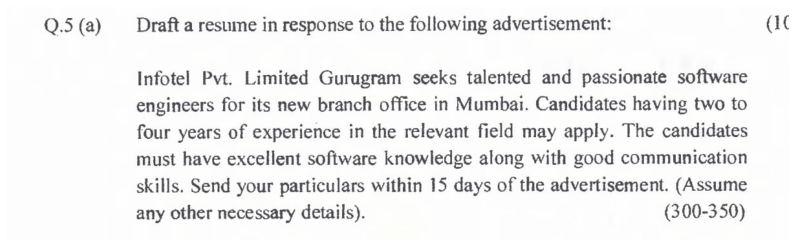

Q.5 (b) With reference to the advertisement given in Q.5 (a) write & cover letter to (10)


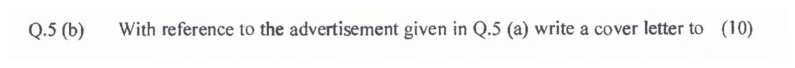

In [31]:
import os
file_name = os.path.basename('/root/file.ext')
print()
corpp_dic={}
for img_info in list(map(lambda x:x['path'],dataset_train.image_info))+list(map(lambda x:x['path'],dataset_val.image_info)):
    img = Image.open(img_info).convert('RGB')
    file_name=os.path.basename(img_info)
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    results = model.detect([original_image], verbose=1)
    r = results[0]
    rois=[]
    for i,j in zip(r['scores'],r['rois']):
        if i>=0.95:
            rois.append(j)
    q_arr,rois=extract_questions_image(rois,img2)
    corpp_dic[os.path.splitext(file_name)[0]]={'q_arr':q_arr,'rois':rois}
    break


In [32]:
corpp_dic

{'289bcdb1-7-1': {'q_arr': ["paragraphs ' With   the   above statement in  inird,  discuss how we can improve our writing skills by learning to use the right words; form correct sentences and construct effective paragraphs Cite suitable examples: (300-350)",
   'Q.2 Write an article on the following topic in the narrative style in about words:',
   '#Sometimes; the biggest learning in our life comes from small incidents',
   'Write an article on the following topic in the analytical style in about 150 words: "Effects of social media on college students\'',
   'Q.3 Elaborate the process of communication  with the help of an example: Discuss the significance of constructive and destructive feedback in communication. Substantiate with suitable examples: (300-350)',
   'Q.4 Write an exhaustive note on the principles that one should follow while writing & proposal Also explain the guidelines for responding to an RFP . (300- 350)',
   'Q.5 (a) Draft a resuine in response to the following adv

In [33]:
from googlesearch import search

In [40]:
qt = "How does deadlock prevention differ from deadlock aviodence"
links =list(search(qt,stop=3))
links

['https://pediaa.com/what-is-the-difference-between-deadlock-prevention-and-deadlock-avoidance/',
 'https://www.geeksforgeeks.org/difference-between-deadlock-prevention-and-deadlock-avoidance/',
 'https://euresisjournal.org/what-is-the-difference-between-deadlock-prevention-and-deadlock-avoidance']

In [42]:
for img_dic in corpp_dic.keys():
  qns_lst = corpp_dic[img_dic]['q_arr']
  ans_lst=[]
  for qn in qns_lst:
    links = list(search(qn,stop=3))
    ans_lst.append(links)
  corpp_dic[img_dic]['ans_arr'] = ans_lst
corpp_dic

{'289bcdb1-7-1': {'ans_arr': [['https://opentextbc.ca/writingforsuccess/chapter/chapter-3-putting-ideas-into-your-own-words-and-paragraphs/',
    'https://www.riosalado.edu/web/oer/WRKDEV100-20012_INTER_0000_v1/lessons/Mod02_WritingEffectiveParagraphs.shtml',
    'https://wts.indiana.edu/writing-guides/paragraphs-and-topic-sentences.html'],
   ['https://essaypro.com/blog/narrative-essay',
    'https://www.scribbr.com/academic-essay/narrative-essay/',
    'https://openoregon.pressbooks.pub/aboutwriting/chapter/types-of-writing-styles/'],
   ['https://www.quora.com/Which-small-incident-taught-you-a-lesson',
    'https://www.quora.com/Which-incident-gave-you-the-best-lesson-of-life',
    'https://www.quora.com/What-is-the-smallest-thing-or-incident-that-taught-you-a-lesson-for-life'],
   ['https://www.technicianonline.com/opinion/the-impact-of-social-media-on-student-life/article_d1142b70-5a92-11e5-86b4-cb7c98a6e45f.html',
    'https://scholarsarchive.jwu.edu/cgi/viewcontent.cgi?article=1